### lab10 Fast Fourier transform
## nov14,2025

In [139]:
 import xarray as xr
import numpy as np
import math



### time series plot of random data

[ 0.8         1.54315589  2.07177877  2.23910363  1.99185843  1.38468267
  0.56568542 -0.26299086 -0.89903811 -1.19385325]


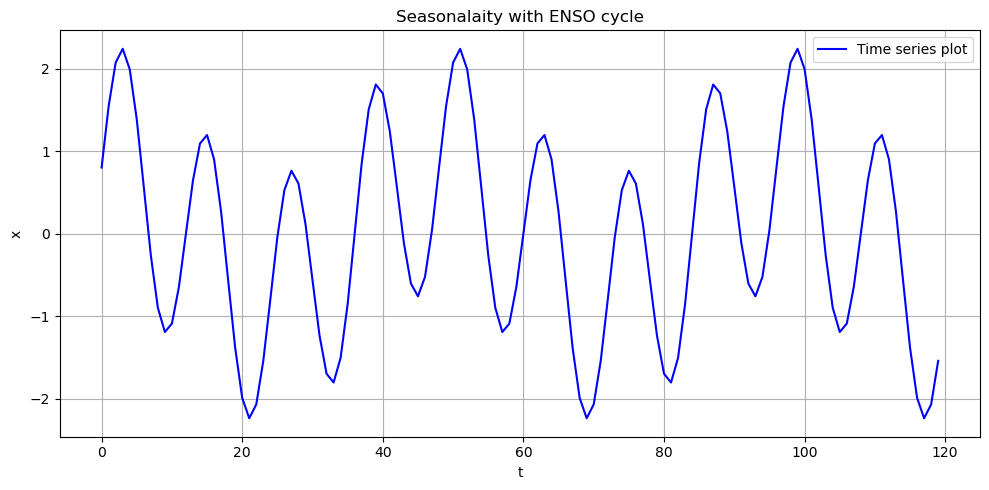

In [140]:
#using for loop function 
t = np.arange(0, 120, 1)

# Calculate xx using numpy's sin and cos 
xx = (1.5 * np.sin((2 * np.pi * t) / 12)) + (0.8 * np.cos((2 * np.pi * t) / 48))
print(xx[:10])


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(t, xx, label='Time series plot', color='b')
plt.title("Seasonalaity with ENSO cycle")
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


    
    
    
    
                  

### add noise to original data

[ 0.74036981  1.41125762  2.23358322  2.00069015  1.76070404  1.58905763
  0.35052699 -0.10758743 -0.89718912 -1.181615   -0.99065981 -0.34379333
  0.08482133  0.86507587  1.29323256  0.87963274  1.01360216  0.42108909
 -1.08347091 -1.25872978 -2.09857022 -2.17681308 -2.39373613 -1.96708539
 -0.82899741 -0.08802776  0.65771881  0.68923736  0.36154816 -0.10343923
 -0.91524509 -1.20483498 -1.3489413  -1.8603896  -1.48964476 -0.60615971
  0.13517928  0.60619648  1.590466    1.49839813  1.87542004  1.20601487
  0.28549337 -0.38137615 -0.4457336  -0.98388083 -0.71425378 -0.0994013
  0.7176397   1.508187    2.43095134  2.42432985  2.01536263  1.77887814
  0.57723762  0.00886897 -0.91836663 -1.09895929 -1.22631926 -0.45357067
 -0.18337544  0.86519564  0.84142312  1.31265891  0.99841284  0.20294078
 -0.59496415 -1.20463093 -2.02652842 -2.42714488 -2.08028992 -1.24672661
 -0.69330206  0.46191037  0.34646378  0.92802223  0.37017465 -0.04851998
 -0.62484106 -1.47007054 -1.74490589 -1.51537659 -1.

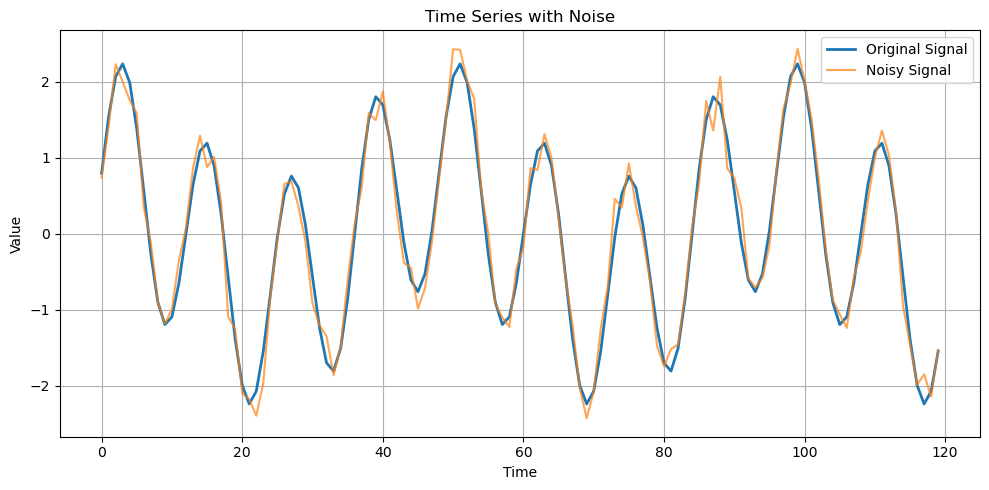

In [141]:
# Add Gaussian noise (mean=0, std=0.2)
noise = np.random.normal(0, 0.2, size=len(t))
xx_noisy = xx + noise
print(xx_noisy)
# Plot the clean and noisy signals
plt.figure(figsize=(10, 5))
plt.plot(t, xx, label='Original Signal', linewidth=2)
plt.plot(t, xx_noisy, label='Noisy Signal', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Noise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [142]:
from scipy.fft import fft, ifft, fftfreq
fft= fft(xx)
print(fft)


[0.8-0.00000000e+00j 0.8+5.82751126e+00j 0.8+2.71764208e+01j
 0.8-3.33147557e+01j 0.8-1.25085427e+01j 0.8-8.11375647e+00j
 0.8-6.12091421e+00j 0.8-4.95458670e+00j 0.8-4.17704499e+00j
 0.8-3.61607340e+00j 0.8-9.31892978e+01j 0.8-2.85199308e+00j
 0.8-2.57761169e+00j 0.8-2.34931823e+00j 0.8-2.15587760e+00j
 0.8-1.98948176e+00j 0.8-1.84452239e+00j 0.8-1.71685931e+00j
 0.8-1.60336477e+00j 0.8-1.50162870e+00j 0.8-1.40976207e+00j
 0.8-1.32626186e+00j 0.8-1.24991636e+00j 0.8-1.17973713e+00j
 0.8-1.11490936e+00j 0.8-1.05475489e+00j 0.8-9.98704471e-01j
 0.8-9.46276449e-01j 0.8-8.97060329e-01j 0.8-8.50703921e-01j
 0.8-8.06903168e-01j 0.8-7.65394050e-01j 0.8-7.25946059e-01j
 0.8-6.88356915e-01j 0.8-6.52448247e-01j 0.8-6.18062040e-01j
 0.8-5.85057693e-01j 0.8-5.53309566e-01j 0.8-5.22704931e-01j
 0.8-4.93142231e-01j 0.8-4.64529626e-01j 0.8-4.36783730e-01j
 0.8-4.09828555e-01j 0.8-3.83594582e-01j 0.8-3.58017971e-01j
 0.8-3.33039874e-01j 0.8-3.08605827e-01j 0.8-2.84665230e-01j
 0.8-2.61170877e-01j 0.8

### FFT TIME SERIES

[ 0.          0.00833333  0.01666667  0.025       0.03333333  0.04166667
  0.05        0.05833333  0.06666667  0.075       0.08333333  0.09166667
  0.1         0.10833333  0.11666667  0.125       0.13333333  0.14166667
  0.15        0.15833333  0.16666667  0.175       0.18333333  0.19166667
  0.2         0.20833333  0.21666667  0.225       0.23333333  0.24166667
  0.25        0.25833333  0.26666667  0.275       0.28333333  0.29166667
  0.3         0.30833333  0.31666667  0.325       0.33333333  0.34166667
  0.35        0.35833333  0.36666667  0.375       0.38333333  0.39166667
  0.4         0.40833333  0.41666667  0.425       0.43333333  0.44166667
  0.45        0.45833333  0.46666667  0.475       0.48333333  0.49166667
 -0.5        -0.49166667 -0.48333333 -0.475      -0.46666667 -0.45833333
 -0.45       -0.44166667 -0.43333333 -0.425      -0.41666667 -0.40833333
 -0.4        -0.39166667 -0.38333333 -0.375      -0.36666667 -0.35833333
 -0.35       -0.34166667 -0.33333333 -0.325      -0

C:\Users\user\AppData\Local\Temp\ipykernel_8496\438806152.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/(freq[:n//2]), np.abs(fft[:n//2]), label='FFT', linewidth=2)


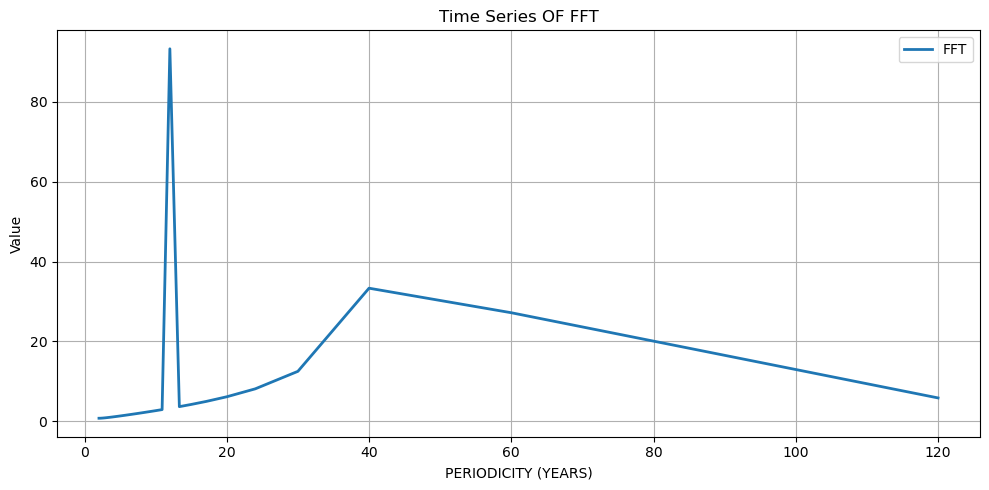

In [143]:
#fft.fftfreq(n, d=1.0)
#n = signal.size
#timestep = 0.1
n=120
t = np.arange(120)
freq = np.fft.fftfreq(120, d=1)
print(freq)

# Plot the FTT with freq
plt.figure(figsize=(10, 5))
plt.plot(1/(freq[:n//2]), np.abs(fft[:n//2]), label='FFT', linewidth=2)
plt.xlabel('PERIODICITY (YEARS)')
plt.ylabel('Value')
plt.title('Time Series OF FFT')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

            

C:\Users\user\AppData\Local\Temp\ipykernel_8496\2682061773.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq[:n//2], np.square(np.abs(fft[:n//2])), label='FFT Power Spectrum', linewidth=2)


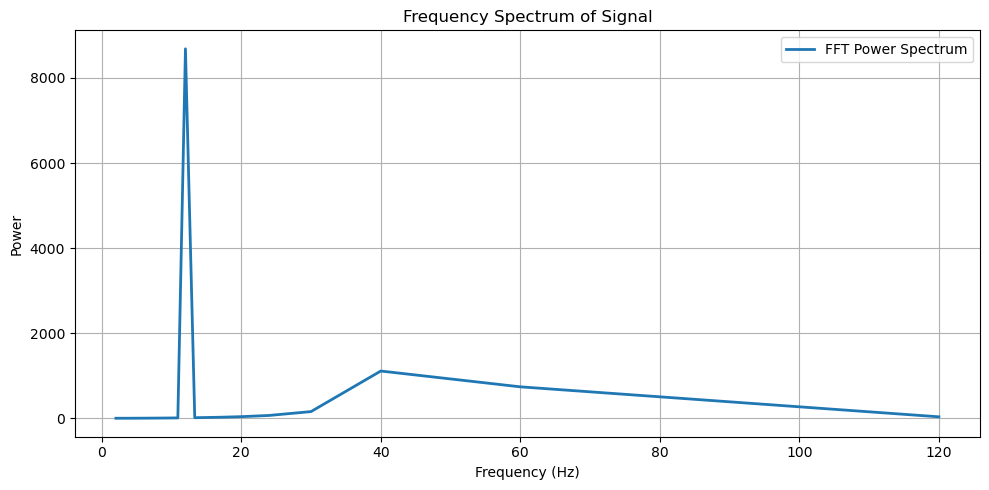

In [144]:
### POWER ON Y-AXIS
plt.figure(figsize=(10, 5))
plt.plot(1/freq[:n//2], np.square(np.abs(fft[:n//2])), label='FFT Power Spectrum', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency Spectrum of Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### FOR HADLEY SST DATA

In [145]:
#path to the folder 
path="C:\\Users\\user\\Desktop\\25CL05010\\17_oct_cda\\HadISST_sst.nc"
ds=xr.open_dataset(path)
ds
#Defining the variable
sst=ds['sst']
#extracting the EL NINO3.4 area
lat_long=sst.sel(longitude=slice(-170,-120) , latitude=slice(5,-5))
lat_long
#domain average
steps=lat_long.mean(dim=['latitude','longitude'])
steps

<xarray.DataArray 'sst' (time: 1868)>
array([25.53982 , 25.541965, 26.419277, ..., 27.669348, 27.159168,
       26.725466], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-08-...

### FTT TIME SERIES PLOT

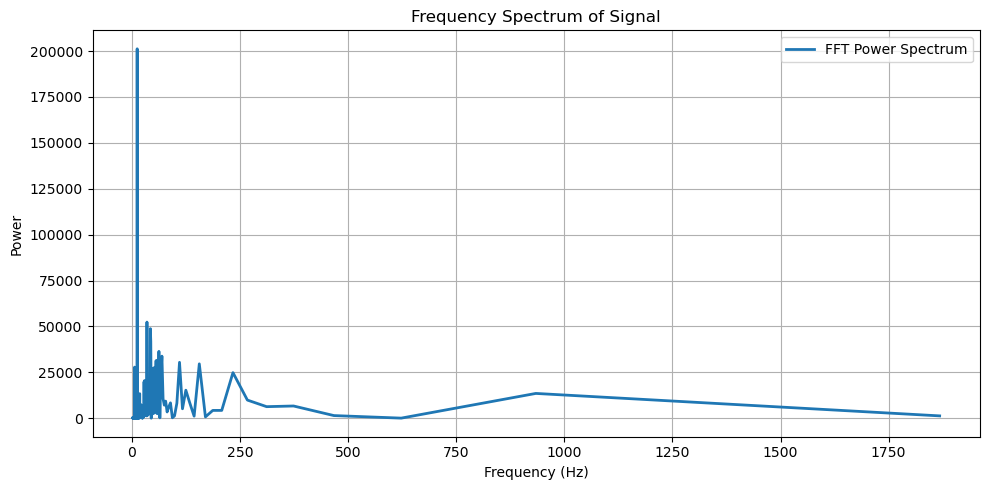

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define signal
n = 1868
timestep = 1.0
t = np.arange(n)

# Compute FFT
ft_result = np.fft.fft(steps)

# Frequency bins
freq1 = fftfreq(n, d=timestep)

# Avoid division by zero
valid = freq1[:n//2] != 0

# Plot FFT power spectrum
plt.figure(figsize=(10, 5))
plt.plot(1/freq1[:n//2][valid], np.square(np.abs(ft_result[:n//2][valid])), label='FFT Power Spectrum', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency Spectrum of Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### LIMITING X -AXIS 

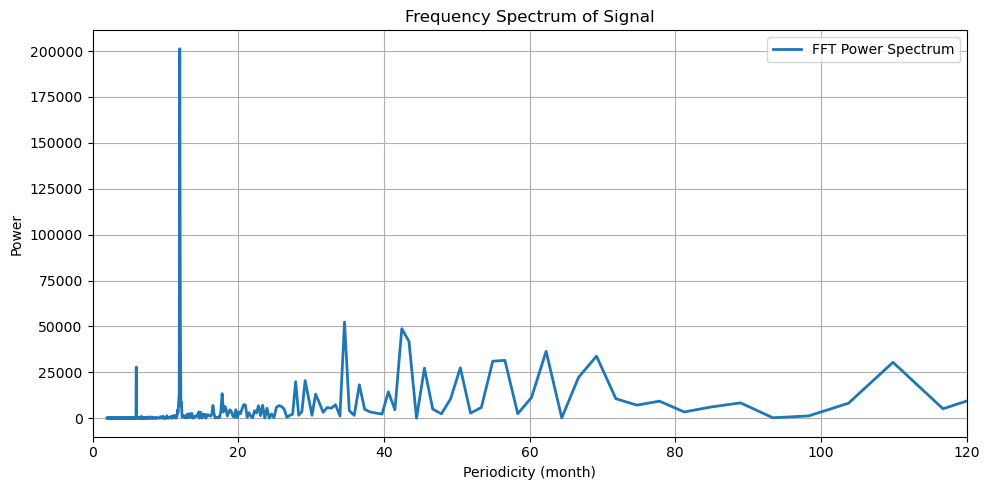

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define signal
n = 1868
timestep = 1.0
t = np.arange(n)

# Compute FFT
ft_result = np.fft.fft(steps)

# Frequency bins
freq1 = fftfreq(n, d=timestep)

# Avoid division by zero
valid = freq1[:n//2] != 0

# Plot FFT power spectrum
plt.figure(figsize=(10, 5))
plt.plot(1/freq1[:n//2][valid], np.square(np.abs(ft_result[:n//2][valid])), label='FFT Power Spectrum', linewidth=2)

plt.xlim(0,120)
plt.xlabel('Periodicity (month)')
plt.ylabel('Power')
plt.title('Frequency Spectrum of Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
### Calculating monthly climatology and anomaly

<xarray.DataArray 'sst' (month: 12)>
array([26.49124 , 26.686073, 27.129366, 27.655243, 27.688683, 27.564528,
       27.070885, 26.740528, 26.595129, 26.595337, 26.516775, 26.512148],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.
<xarray.DataArray 'sst' (time: 1868)>
array([-0.95141983, -1.1441078 , -0.71008873, ...,  0.10482025,
        0.08828354, -0.01506233], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-08-...
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8


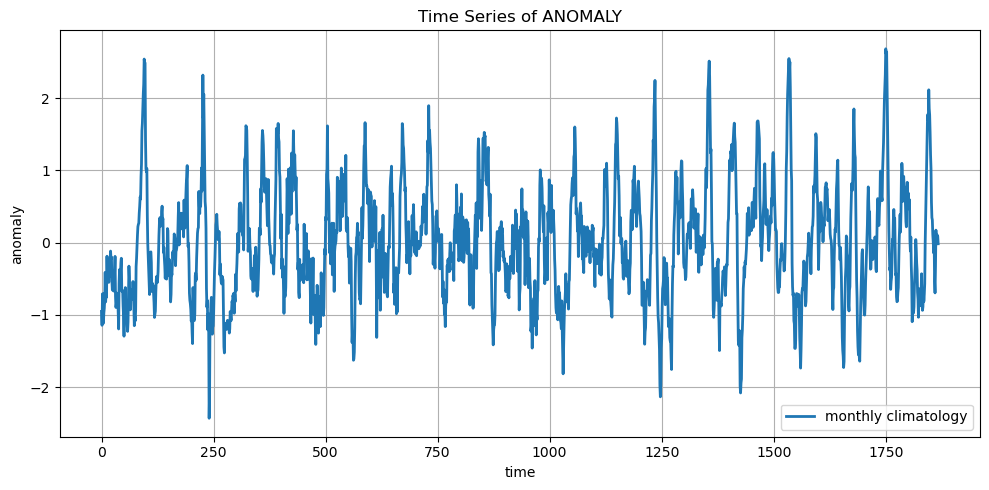

In [149]:
clim = steps.groupby('time.month').mean(dim='time')
print(clim)
data= steps.groupby('time.month')
print(data)
anomaly= data-clim
print(anomaly)
# Plot the anomaly
plt.figure(figsize=(10, 5))
plt.plot(t, anomaly, label='monthly climatology', linewidth=2)
plt.xlabel('time')
plt.ylabel('anomaly')
plt.title('Time Series of ANOMALY')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### FFT OF ANOMALY

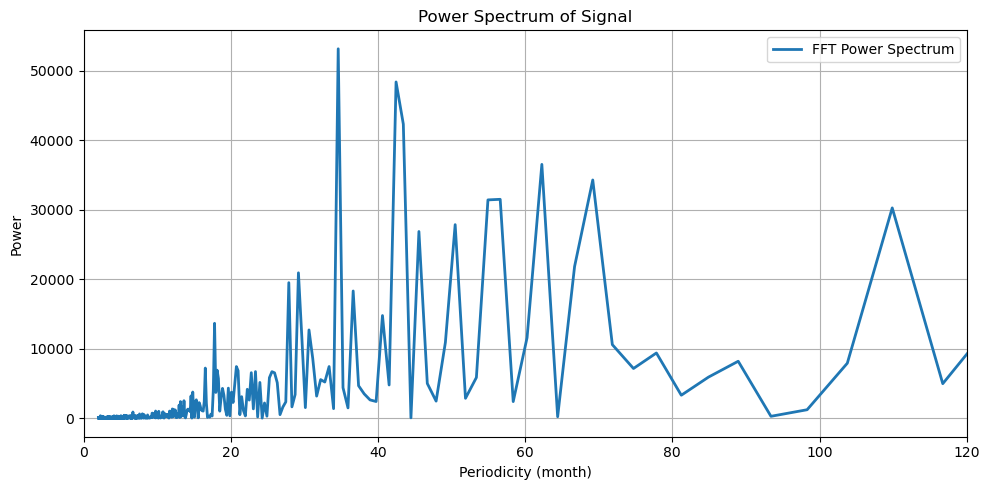

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Define signal
n = 1868
timestep = 1.0
t = np.arange(n)

# Compute FFT
fft_result = np.fft.fft(anomaly)

# Frequency bins
freq1 = fftfreq(n, d=timestep)

# Avoid division by zero
valid = freq1[:n//2] != 0

# Plot FFT power spectrum
plt.figure(figsize=(10, 5))
plt.plot(1/freq1[:n//2][valid], np.square(np.abs(fft_result[:n//2][valid])), label='FFT Power Spectrum', linewidth=2)

plt.xlim(0,120)
plt.xlabel('Periodicity (month)')
plt.ylabel('Power')
plt.title('Power Spectrum of Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
print(data[1])

<xarray.DataArray 'sst' (time: 156)>
array([25.53982 , 26.303698, 25.83505 , 25.765947, 25.60942 , 25.83333 ,
       25.60038 , 26.902485, 28.977655, 26.00056 , 25.543907, 26.840258,
       26.096386, 26.083954, 26.433805, 26.679825, 26.715403, 25.869164,
       26.699232, 28.547   , 24.06011 , 26.099127, 26.04579 , 25.312235,
       25.467438, 25.823841, 26.71311 , 28.047182, 26.048023, 25.808914,
       27.973764, 27.365686, 26.056707, 27.886745, 25.823767, 27.235426,
       27.453815, 25.971304, 26.278479, 26.268269, 25.624933, 25.985136,
       28.108366, 26.357098, 27.257977, 27.43745 , 26.433378, 24.975876,
       25.704103, 28.153023, 27.193138, 26.99035 , 26.004562, 26.138474,
       27.010845, 25.532434, 28.078833, 26.654953, 27.018532, 26.407417,
       26.895687, 28.045887, 26.137562, 26.32856 , 25.62283 , 26.236473,
       27.2926  , 26.24093 , 26.34192 , 25.87703 , 27.745468, 27.933214,
       27.159645, 25.350348, 26.119463, 26.196394, 26.10337 , 26.942822,
       26.5962

In [152]:
print(clim)



<xarray.DataArray 'sst' (month: 12)>
array([26.49124 , 26.686073, 27.129366, 27.655243, 27.688683, 27.564528,
       27.070885, 26.740528, 26.595129, 26.595337, 26.516775, 26.512148],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [153]:
print(anomaly)


<xarray.DataArray 'sst' (time: 1868)>
array([-0.95141983, -1.1441078 , -0.71008873, ...,  0.10482025,
        0.08828354, -0.01506233], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-08-...
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
